1. Realice la búsqueda de un conjunto de datos de mínimo 1000 registros, donde pueda obtener información correspondiente al sector asignado y al cual se le pueda aplicar el método de RBNN. Adjunte enlace de acceso al dataset (enlace de la página de donde obtuvo los datos)

Fuente: https://www.kaggle.com/code/shuan3/feature-engineering-cluster/input

Esta es una fuente con la columna variable objetivo ya ordenada al final, ya que la base de datos original la tiene en otra posición.

La base de datos original fue sacada de la pagina:

https://data.torontopolice.on.ca/

2. Realice la lectura del banco de datos e imprima las categorías que tiene y cuales son las variables dependientes e independientes.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/KSI_CLEAN.csv", sep=",")

df

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_Name,...,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
0,1249781,2011,8,4,23,18,3,43.651545,-79.383490,Toronto Centre-Rosedale (27),...,0,1,0,0,0,0,0,0,0,0
1,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
2,5002235651,2015,12,30,23,39,2,43.682342,-79.328266,Toronto-Danforth (30),...,0,0,0,0,0,1,0,0,0,1
3,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
4,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,1291534,2012,3,2,18,12,4,43.663245,-79.367590,Toronto Centre-Rosedale (28),...,0,0,0,0,1,1,0,0,0,0
12553,1291534,2012,3,2,18,12,4,43.663245,-79.367590,Toronto Centre-Rosedale (28),...,0,0,0,0,1,1,0,0,0,0
12554,1291534,2012,3,2,18,12,4,43.663245,-79.367590,Toronto Centre-Rosedale (28),...,0,0,0,0,1,1,0,0,0,0
12555,6001157650,2016,7,2,18,12,5,43.645874,-79.363430,Toronto Centre-Rosedale (28),...,0,0,0,1,1,1,0,0,0,1


In [ ]:
df = df.iloc[:1100]
df

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_Name,...,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
0,1249781,2011,8,4,23,18,3,43.651545,-79.383490,Toronto Centre-Rosedale (27),...,0,1,0,0,0,0,0,0,0,0
1,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
2,5002235651,2015,12,30,23,39,2,43.682342,-79.328266,Toronto-Danforth (30),...,0,0,0,0,0,1,0,0,0,1
3,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
4,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1217753,2011,2,14,11,0,0,43.683745,-79.498590,York South-Weston (11),...,0,0,0,1,1,1,0,0,0,0
1096,1280520,2012,2,15,11,0,2,43.631445,-79.552290,Etobicoke-Lakeshore (5),...,0,0,0,1,0,0,0,0,0,0
1097,1280520,2012,2,15,11,0,2,43.631445,-79.552290,Etobicoke-Lakeshore (5),...,0,0,0,1,0,0,0,0,0,0
1098,1280520,2012,2,15,11,0,2,43.631445,-79.552290,Etobicoke-Lakeshore (5),...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#categorías del dataset
columns_names = df.columns.values
print(columns_names)

['ACCNUM' 'YEAR' 'MONTH' 'DAY' 'HOUR' 'MINUTES' 'WEEKDAY' 'LATITUDE'
 'LONGITUDE' 'Ward_Name' 'Ward_ID' 'Hood_Name' 'Hood_ID' 'Division'
 'District' 'STREET1' 'STREET2' 'OFFSET' 'ROAD_CLASS' 'LOCCOORD' 'ACCLOC'
 'TRAFFCTL' 'VISIBILITY' 'LIGHT' 'RDSFCOND' 'ACCLASS' 'IMPACTYPE'
 'INVTYPE' 'INVAGE' 'INJURY' 'FATAL_NO' 'INITDIR' 'VEHTYPE' 'MANOEUVER'
 'DRIVACT' 'DRIVCOND' 'PEDTYPE' 'PEDACT' 'PEDCOND' 'CYCLISTYPE' 'CYCACT'
 'CYCCOND' 'PEDESTRIAN' 'CYCLIST' 'AUTOMOBILE' 'MOTORCYCLE' 'TRUCK'
 'TRSN_CITY_VEH' 'EMERG_VEH' 'PASSENGER' 'SPEEDING' 'AG_DRIV' 'REDLIGHT'
 'ALCOHOL' 'DISABILITY' 'FATAL']


In [ ]:
#VARIABLE DEPENDIENTE
dep = df.iloc[:, -1].values
print(dep)

[0 0 1 ... 0 0 0]


In [ ]:
#VARIABLE INDEPENDIENTE
ind = df.iloc[:, :-1].values
print(ind)

[[1249781 2011 8 ... 0 0 0]
 [1311542 2012 8 ... 0 0 0]
 [5002235651 2015 12 ... 0 0 0]
 ...
 [1280520 2012 2 ... 0 0 0]
 [1280520 2012 2 ... 0 0 0]
 [4002267356 2014 6 ... 0 0 0]]


3. Realice el proceso de limpieza de los datos, justficando cada una de las etapas utilizadas.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
df = df.replace(' ', np.nan, regex=False)
print(df.isna().sum())

ACCNUM              0
YEAR                0
MONTH               0
DAY                 0
HOUR                0
MINUTES             0
WEEKDAY             0
LATITUDE            0
LONGITUDE           0
Ward_Name           0
Ward_ID             0
Hood_Name           0
Hood_ID             0
Division            0
District            1
STREET1             0
STREET2           116
OFFSET            967
ROAD_CLASS          0
LOCCOORD            6
ACCLOC            400
TRAFFCTL            0
VISIBILITY          0
LIGHT               0
RDSFCOND            5
ACCLASS             0
IMPACTYPE           0
INVTYPE             0
INVAGE              0
INJURY            123
FATAL_NO            0
INITDIR           346
VEHTYPE           167
MANOEUVER         484
DRIVACT           563
DRIVCOND          562
PEDTYPE           926
PEDACT            927
PEDCOND           923
CYCLISTYPE       1056
CYCACT           1056
CYCCOND          1057
PEDESTRIAN          0
CYCLIST             0
AUTOMOBILE          0
MOTORCYCLE

In [ ]:
# Primero elimino las columnas que no son relevantes para el estudio

In [ ]:
#La columna id no es relevante para el analisis
df.drop(columns=['MONTH'],inplace=True)
df.drop(columns=['DAY'],inplace=True)
df.drop(columns=['HOUR'],inplace=True)
df.drop(columns=['MINUTES'],inplace=True)
df.drop(columns=['WEEKDAY'],inplace=True)
df.drop(columns=['OFFSET'],inplace=True)
df.drop(columns=['LATITUDE'],inplace=True)
df.drop(columns=['LONGITUDE'],inplace=True)
df.drop(columns=['Ward_Name'],inplace=True)
df.drop(columns=['Ward_ID'],inplace=True)
df.drop(columns=['Hood_Name'],inplace=True)
df.drop(columns=['Hood_ID'],inplace=True)
df.drop(columns=['Division'],inplace=True)
df.drop(columns=['District'],inplace=True)
df.drop(columns=['STREET1'],inplace=True)
df.drop(columns=['STREET2'],inplace=True)
df.drop(columns=['ROAD_CLASS'],inplace=True)
df.drop(columns=['LOCCOORD'],inplace=True)
df.drop(columns=['ACCLOC'],inplace=True)
df.drop(columns=['INVAGE'],inplace=True)
df.drop(columns=['FATAL_NO'],inplace=True)
df.drop(columns=['INITDIR'],inplace=True)
df.drop(columns=['MANOEUVER'],inplace=True)
df.drop(columns=['DRIVACT'],inplace=True)
df.drop(columns=['DRIVCOND'],inplace=True)
df.drop(columns=['PEDTYPE'],inplace=True)
df.drop(columns=['PEDACT'],inplace=True)
df.drop(columns=['PEDCOND'],inplace=True)
df.drop(columns=['CYCLISTYPE'],inplace=True)
df.drop(columns=['CYCACT'],inplace=True)
df.drop(columns=['CYCCOND'],inplace=True)

In [ ]:
print(df.dtypes)

ACCNUM            int64
YEAR              int64
TRAFFCTL         object
VISIBILITY       object
LIGHT            object
RDSFCOND         object
ACCLASS          object
IMPACTYPE        object
INVTYPE          object
INJURY           object
VEHTYPE          object
PEDESTRIAN        int64
CYCLIST           int64
AUTOMOBILE        int64
MOTORCYCLE        int64
TRUCK             int64
TRSN_CITY_VEH     int64
EMERG_VEH         int64
PASSENGER         int64
SPEEDING          int64
AG_DRIV           int64
REDLIGHT          int64
ALCOHOL           int64
DISABILITY        int64
FATAL             int64
dtype: object


In [ ]:
# Cambiar todos los tipos de datos de objetos a categoría
objdtype_cols = df.select_dtypes(["object"]).columns
df[objdtype_cols] = df[objdtype_cols].astype('category')

In [ ]:
print(df.dtypes)

ACCNUM              int64
YEAR                int64
TRAFFCTL         category
VISIBILITY       category
LIGHT            category
RDSFCOND         category
ACCLASS          category
IMPACTYPE        category
INVTYPE          category
INJURY           category
VEHTYPE          category
PEDESTRIAN          int64
CYCLIST             int64
AUTOMOBILE          int64
MOTORCYCLE          int64
TRUCK               int64
TRSN_CITY_VEH       int64
EMERG_VEH           int64
PASSENGER           int64
SPEEDING            int64
AG_DRIV             int64
REDLIGHT            int64
ALCOHOL             int64
DISABILITY          int64
FATAL               int64
dtype: object


In [ ]:
print(df.isnull().sum())

ACCNUM             0
YEAR               0
TRAFFCTL           0
VISIBILITY         0
LIGHT              0
RDSFCOND           5
ACCLASS            0
IMPACTYPE          0
INVTYPE            0
INJURY           123
VEHTYPE          167
PEDESTRIAN         0
CYCLIST            0
AUTOMOBILE         0
MOTORCYCLE         0
TRUCK              0
TRSN_CITY_VEH      0
EMERG_VEH          0
PASSENGER          0
SPEEDING           0
AG_DRIV            0
REDLIGHT           0
ALCOHOL            0
DISABILITY         0
FATAL              0
dtype: int64


In [ ]:
import sklearn
from sklearn.impute import SimpleImputer

In [ ]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
# Imputa el valor NaN en las columnas con el valor más frecuente de cada columna
imputer=imputer.fit(df.iloc[:,5:6])
df.iloc[:,5:6]=imputer.transform(df.iloc[:,5:6])

imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer=imputer.fit(df.iloc[:,9:11])
df.iloc[:,9:11]=imputer.transform(df.iloc[:,9:11])

<ipython-input-15-52129192ed19>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,5:6]=imputer.transform(df.iloc[:,5:6])
<ipython-input-15-52129192ed19>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,9:11]=imputer.transform(df.iloc[:,9:11])


In [ ]:
print(df.isnull().sum())

ACCNUM           0
YEAR             0
TRAFFCTL         0
VISIBILITY       0
LIGHT            0
RDSFCOND         0
ACCLASS          0
IMPACTYPE        0
INVTYPE          0
INJURY           0
VEHTYPE          0
PEDESTRIAN       0
CYCLIST          0
AUTOMOBILE       0
MOTORCYCLE       0
TRUCK            0
TRSN_CITY_VEH    0
EMERG_VEH        0
PASSENGER        0
SPEEDING         0
AG_DRIV          0
REDLIGHT         0
ALCOHOL          0
DISABILITY       0
FATAL            0
dtype: int64


4. Para el caso de datos nulos o no válidos, realice el análisis de cuál es el mejor procedimiento para realizar el tratamiento de esos datos y justifique cada uno de los procedimientos utilizados.

**Justificación**:

- Primero se eliminan las columnas que no se van a utilizar o no son relevantes en el análisis, ya sea por el tipo de variables que contienen o porque no tienen un nombre que describa claramente lo que contiene la columna, se realiza con el método .drop

- Se usa metodo de imputacion con
import sklearn
from sklearn.impute import SimpleImputer

- Se hace usando el más frecuente, por sus variables categoricas que luego habrá que cambiar pero para este caso en la limpieza decido hacerla con esa libreria

5. Realice un análisis de correlación y determine cuales de las variables del conjunto de datos tiene correlación con la variable objetivo, justifique su respuesta.

<ipython-input-17-48633514286e>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=abs(df.corr())


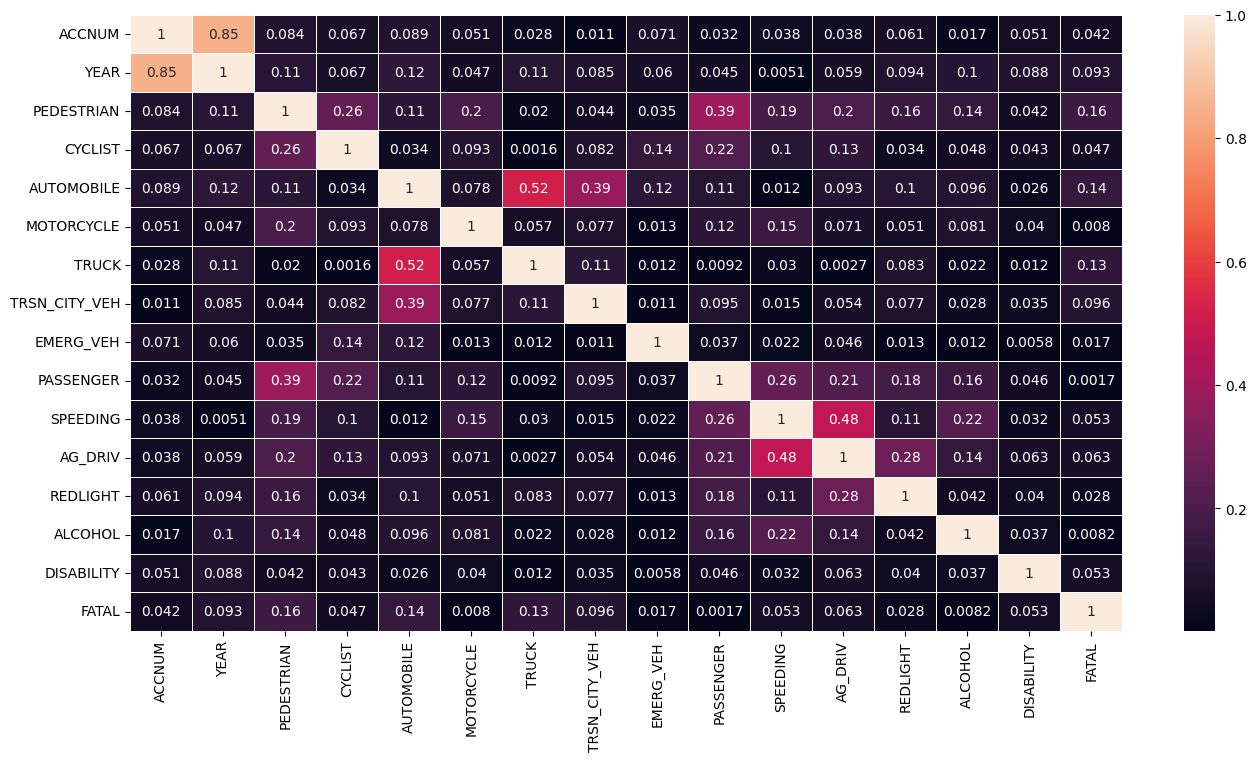

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
plt.figure(figsize=(16,8))
corr=abs(df.corr())
sns.heatmap(corr, linewidth=0.4, annot=True)

plt.show()

In [ ]:
df[['FATAL','PEDESTRIAN']].corr()


,FATAL,PEDESTRIAN
FATAL,1.000000,0.159539
PEDESTRIAN,0.159539,1.000000


In [ ]:
df[['FATAL','TRUCK']].corr()

,FATAL,TRUCK
FATAL,1.000000,0.127756
TRUCK,0.127756,1.000000



En el análisis de correlación se puede interpretar como, ninguna tiene una
correlación perfecta pero si hay un par que las tienen:


*   La variable objetivo es FATAL, entonces FATAL y pedestrian tiene una relación pequeña de 0.15 pero es útil para el análisis, de la misma forma que TRUCK también es útil para el análisis ya que tiene un valor de correlación del 0.12.
*   Para el resto de las variables no es pertinente tomarlas en cuenta, ya que su valor de correlación es muy pequeño


6. Divida el conjunto de datos así, 80% entrenamiento y 20% pruebas.

In [ ]:
#X = df.drop(columns = 'FATAL')
#y = df['FATAL']
#X

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

**Importante**: como luego en el siguiente punto se pasan variables categoricas a numericas, a la hora de la estadarización, es importante que los datos de entrenamiento y prueba también lo estén. Por lo que el codigo de este punto se ejecuta mejor después de transformar los atributos categorcios a numericos

7. En caso de ser necesario transforme los atributos categóricos a numéricos. Explique la elección del método utilizado para su conjunto de datos.

In [ ]:
df

,ACCNUM,YEAR,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INJURY,...,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
0,1249781,2011,No Control,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,Driver,None,...,0,1,0,0,0,0,0,0,0,0
1,1311542,2012,No Control,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,Passenger,Minimal,...,0,0,0,1,1,1,0,0,0,0
2,5002235651,2015,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,Pedestrian,Fatal,...,0,0,0,0,0,1,0,0,0,1
3,1311542,2012,No Control,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,Vehicle Owner,None,...,0,0,0,1,1,1,0,0,0,0
4,1311542,2012,No Control,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,Driver,None,...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1217753,2011,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Approaching,Driver,Major,...,0,0,0,1,1,1,0,0,0,0
1096,1280520,2012,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Turning Movement,Passenger,Major,...,0,0,0,1,0,0,0,0,0,0
1097,1280520,2012,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Turning Movement,Driver,Minor,...,0,0,0,1,0,0,0,0,0,0
1098,1280520,2012,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Turning Movement,Driver,None,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
print(df.dtypes)

ACCNUM              int64
YEAR                int64
TRAFFCTL         category
VISIBILITY       category
LIGHT            category
RDSFCOND           object
ACCLASS          category
IMPACTYPE        category
INVTYPE          category
INJURY             object
VEHTYPE            object
PEDESTRIAN          int64
CYCLIST             int64
AUTOMOBILE          int64
MOTORCYCLE          int64
TRUCK               int64
TRSN_CITY_VEH       int64
EMERG_VEH           int64
PASSENGER           int64
SPEEDING            int64
AG_DRIV             int64
REDLIGHT            int64
ALCOHOL             int64
DISABILITY          int64
FATAL               int64
dtype: object


In [ ]:
objdtype_cols = df.select_dtypes(["object"]).columns
df[objdtype_cols] = df[objdtype_cols].astype('category')

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['TRAFFCTL'] = label_encoder.fit_transform(df['TRAFFCTL'])
df['VISIBILITY'] = label_encoder.fit_transform(df['VISIBILITY'])
df['LIGHT'] = label_encoder.fit_transform(df['LIGHT'])
df['RDSFCOND'] = label_encoder.fit_transform(df['RDSFCOND'])
df['ACCLASS'] = label_encoder.fit_transform(df['ACCLASS'])
df['IMPACTYPE'] = label_encoder.fit_transform(df['IMPACTYPE'])
df['INVTYPE'] = label_encoder.fit_transform(df['INVTYPE'])
df['INJURY'] = label_encoder.fit_transform(df['INJURY'])
df['VEHTYPE'] = label_encoder.fit_transform(df['VEHTYPE'])

In [ ]:
X = df.drop(columns = 'FATAL')
y = df['FATAL']
X

,ACCNUM,YEAR,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INJURY,...,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY
0,1249781,2011,0,0,0,0,1,4,1,4,...,0,0,1,0,0,0,0,0,0,0
1,1311542,2012,0,0,1,0,1,4,7,2,...,0,0,0,0,1,1,1,0,0,0
2,5002235651,2015,0,0,1,0,0,4,8,0,...,0,0,0,0,0,0,1,0,0,0
3,1311542,2012,0,0,1,0,1,4,10,4,...,0,0,0,0,1,1,1,0,0,0
4,1311542,2012,0,0,1,0,1,4,1,4,...,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1217753,2011,0,0,2,0,1,1,1,1,...,0,0,0,0,1,1,1,0,0,0
1096,1280520,2012,6,0,2,0,1,9,7,1,...,0,0,0,0,1,0,0,0,0,0
1097,1280520,2012,6,0,2,0,1,9,1,3,...,0,0,0,0,1,0,0,0,0,0
1098,1280520,2012,6,0,2,0,1,9,1,4,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

Para esta base de datos si es necesario transformar algunas columnas que tienen valores categoricos a valores numéricos para poder utilizarlos en el algoritmo.

primero como se puede observar con la línea de codigo print(df.dtypes), hay valores de tipo object por lo que es necesario primero pasarlos a 'category'.

Posteriormente luego de pasar los valores de object a category, utilicé LabelEncoder ya que este permite pasar valores categoricos a numericos y los deja en valores numericos apropiados para trabajarlos en el taller.

8. Para el conjunto de datos de entrenamiento realice el escalado del conjunto (normalización o estandarización) realice la justificación del método seleccionado para su conjunto de datos.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

La estandarización escala cada variable de entrada por separado restando la media, luego divide por la desviación estándar para cambiar la distribución para tener una media de cero y una desviación estándar de uno. Entoces para este ejercicio de acuerdo a los datos que tengo es apropiado su uso

9. Realice la implementación de la RBNN en su conjunto de datos, Defina la taza de aprendizaje y el error en 0.01 y 1e-7 respectivamente, justifique la técnica utilizada para definir el número de centroides

In [ ]:
df.columns

Index(['ACCNUM', 'YEAR', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INJURY', 'VEHTYPE', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'FATAL'],
      dtype='object')

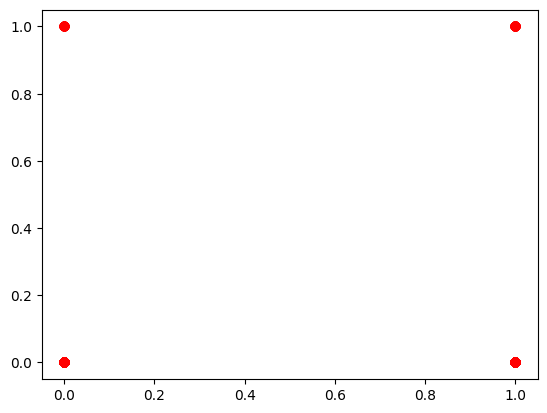

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import statistics as stat

def generate_data_points(num_data_points):
  y_list = df['FATAL']
  desired_y_list = df['FATAL']
  x_list = df['PEDESTRIAN']
  return x_list, y_list, desired_y_list

x_list, y_list, desired_y_list = generate_data_points(75)
data = np.array([x_list, y_list])

#print(data)
#print(data[0][0])

clusters_x = np.random.choice(np.squeeze(data[0]), size=1)
clusters_y = np.random.choice(np.squeeze(data[1]), size=1)
clusters = np.array([clusters_x, clusters_y])

plt.plot(x_list, y_list, 'ro')

In [ ]:
#uso de kmeans para encontrar los centroides
def kmeans(data, num_clusters):
  clusters_x = np.random.choice(np.squeeze(data[0]), size=num_clusters)
  clusters_y = np.random.choice(np.squeeze(data[1]), size=num_clusters)
  clusters = np.array([clusters_x, clusters_y])
  prev_clusters = clusters.copy()
  variance = np.zeros(num_clusters)
  converged = False
  all_same_variance = 0

  dp, num_clusters = (len(data[0]), num_clusters)
  distance = np.array([[[0.0, 0.0, 0.0] for i in range(dp)] for j in range(num_clusters)])

  while not converged:

    for i in range(num_clusters):
      cluster = [clusters[0][i], clusters[1][i]]
      for j in range(len(data[0])):
        dp = [data[0][j], data[1][j]]
        squared_distance = (cluster[0] - dp[0])**2 + (cluster[1] - dp[1])**2
        all_same_variance += squared_distance
        distance[i][j][0] = squared_distance
        distance[i][j][1] = dp[0]
        distance[i][j][2] = dp[1]

    distanceT = distance.transpose(1,0,2)
    current_cluster_index = 0
    smallest_data_point_x = 0
    smallest_data_point_y = 0
    smallestDistance = 1000
    clusters.fill(0)
    num_dp_belongs_to_each_cluster = [1 for i in range(num_clusters)]
    cluster_dp_x = [[] for i in range(num_clusters)]
    cluster_dp_y = [[] for i in range(num_clusters)]

    for i in range(len(distanceT)):
      for j in range(len(distanceT[i])):
        dis = distanceT[i][j][0]
        if dis < smallestDistance:
          smallestDistance = dis
          smallest_data_point_x = distanceT[i][j][1]
          smallest_data_point_y = distanceT[i][j][2]
          current_cluster_index = j
      smallestDistance = 1000
      num_dp_belongs_to_each_cluster[current_cluster_index] += 1
      clusters[0][current_cluster_index] += smallest_data_point_x
      cluster_dp_x[current_cluster_index].append(smallest_data_point_x)
      clusters[1][current_cluster_index] += smallest_data_point_y
      cluster_dp_y[current_cluster_index].append(smallest_data_point_y)


    for i in range(num_clusters):
      clusters[0][i] = clusters[0][i] / num_dp_belongs_to_each_cluster[i]
      clusters[1][i] = clusters[1][i] / num_dp_belongs_to_each_cluster[i]


    converged = np.linalg.norm(clusters - prev_clusters) < 1e-6
    prev_clusters = clusters.copy()

  clusters = clusters.transpose()
  clustersWithNoPoints = []
  for i in range(num_clusters):
    dp_for_cluster = num_dp_belongs_to_each_cluster[i]
    if dp_for_cluster < 2:

      clustersWithNoPoints.append(i)
      continue
    else:
      distance_dp_to_cluster = []
      for j in range(len(cluster_dp_x[i])):
        cluster_x = clusters[i][0]
        clsuter_y = clusters[i][1]
        dp_x = cluster_dp_x[i][j]
        dp_y = cluster_dp_y[i][j]
        delta_x_square = (cluster_x - dp_x)**2
        delta_y_square = (clsuter_y - dp_y)**2
        distance_dp_to_cluster.append(math.sqrt(delta_x_square + delta_y_square))
      if len(distance_dp_to_cluster) < 2:
        variance[i] = 0
      else:
        variance[i] = stat.variance(distance_dp_to_cluster)

  if len(clustersWithNoPoints) > 0:
    avg_variance_all_other_clusters = []

    for i in range(num_clusters):
      if i not in clustersWithNoPoints:
        avg_variance_all_other_clusters.append(variance[i])
    variance[clustersWithNoPoints] = np.mean(avg_variance_all_other_clusters)

  all_same_variance = all_same_variance/num_clusters
  all_same_variance = np.array([all_same_variance for i in range(len(variance))])

  return clusters, variance

clusters, variance = kmeans(data, num_clusters=3)
print('Final clusters: ', clusters)
print('Final variance: ', variance)

Final clusters:  [[0 0]
 [0 0]
 [0 0]]
Final variance:  [0.29700277 0.29700277 0.29700277]


Precisión de predicción de puntos:  0.0
Average error of all points:  0.21578341530265888


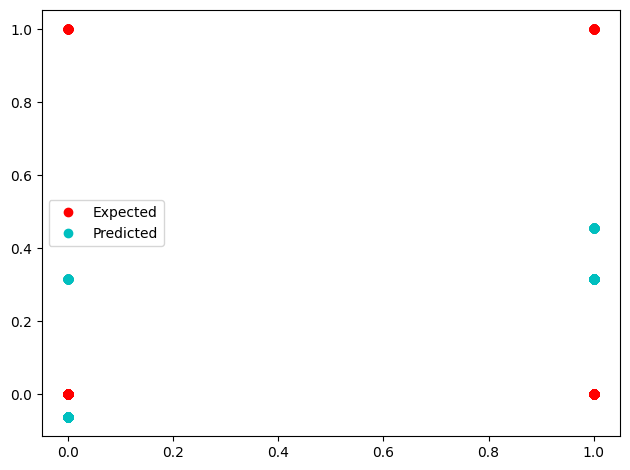

In [ ]:
#aplicación de RBF

def rbf(x, centers, variance):
    return np.exp(-np.linalg.norm(centers - x)**2)

class RBFNet(object):

    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)

    def fit(self, X, y):
      self.centers, self.variance = kmeans(X, self.k)

      X = X.transpose()
      for epoch in range(self.epochs):
        for i in range(X.shape[0]):

            a = np.array([self.rbf(X[i], center, variance) for center, variance, in zip(self.centers, self.variance)])
            F = a.T.dot(self.w) + self.b
            loss = (y[i] - F).flatten() ** 2


            error = -(y[i] - F).flatten()

            self.w = self.w - self.lr * a * error
            self.b = self.b - self.lr * error

    def predict(self, X):
      y_pred = []
      X = X.transpose()
      for i in range(len(X)):
        a = np.array([rbf(X[i], center, variance) for center, variance, in zip(self.centers, self.variance)])
        F = a.T.dot(self.w) + self.b
        y_pred.append(F)
      return y_pred


# creacion de la red RBF
rbfnet = RBFNet(lr=0.01, k=8)
# entrenamiento
rbfnet.fit(data, desired_y_list)
# prediccion
y_pred = rbfnet.predict(data)

plt.plot(data[0], y_list, 'ro', label='Expected')
plt.plot(data[0], y_pred, 'co', label='Predicted')


num_correct_prediction_points = 0
for i in range(len(y_list)):
  if abs(y_pred[i] - y_list[i]) < 1e-7:
    num_correct_prediction_points += 1
print('Precisión de predicción de puntos: ', num_correct_prediction_points/len(y_list))

avgError = np.mean([abs(y_pred[i] - y_list[i]) for i in range(len(y_list))])
print('Average error of all points: ', avgError)

plt.legend()
plt.tight_layout()
plt.show()

En este caso para determinar los centroides utilicé kmeans ya que permite en el ejercicio elegir cuántas agrupaciones quiero y nos muetra también la varianza que es necesaria para ejecutar la redes RBF

10. Valide utilizando el método de validación cruzada por lo menos 3 topologías de la red e imprima los resultados para cada topología y justifique la elección de la topología implementada.

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
X = x_list
y= y_list

kf = KFold(n_splits = 4, shuffle = True, random_state = 2)

for entrenamiento_indice, prueba_indice in kf.split(X):
  print("\nEntrenamiento:", entrenamiento_indice, "\nPrueba: ", prueba_indice)
  X_entrenamiento, X_prueba = X[entrenamiento_indice], X[prueba_indice]
  y_entrenamiento, y_prueba = y[entrenamiento_indice], y[prueba_indice]
  X_entrenamiento = X_entrenamiento.values.reshape([X_entrenamiento.values.shape[0],])
  X_prueba = X_prueba.values.reshape([X_prueba.values.shape[0],1])
  rbfnet.fit(data, desired_y_list)
  y_pred = rbfnet.predict(data)
  print(y_pred)
  print("Error: ", mean_squared_error(y_list, y_pred))


Entrenamiento: [   0    1    2    3    4    5    6    8    9   10   11   12   13   14
   16   17   19   21   22   23   24   25   26   27   28   29   30   31
   32   33   34   35   36   38   39   40   41   42   43   44   45   46
   48   49   50   51   52   53   54   55   56   57   59   62   63   64
   69   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   90   92   93   94   95   96   97   98  100  103
  104  105  106  107  108  109  110  111  112  113  114  115  116  117
  118  119  120  121  122  123  124  125  126  127  129  130  131  132
  133  134  135  136  138  139  140  142  144  145  147  149  150  151
  152  153  154  156  157  159  160  161  162  163  165  166  167  168
  170  172  173  174  175  176  177  178  179  180  181  184  185  186
  187  188  189  190  191  192  195  196  198  201  202  203  204  205
  206  207  208  209  210  211  214  215  216  217  218  219  220  221
  222  224  225  227  228  229  231  233  234  236  237  238 

11. Realice la validación con su conjunto de datos de pruebas, imprima la matriz de confusión si su ejercicio es de clasificación y explique los resultados. Si su ejercicio es de aproximación de funciones imprima el error cuadrático medio de las predicciones y explique su respuesta.

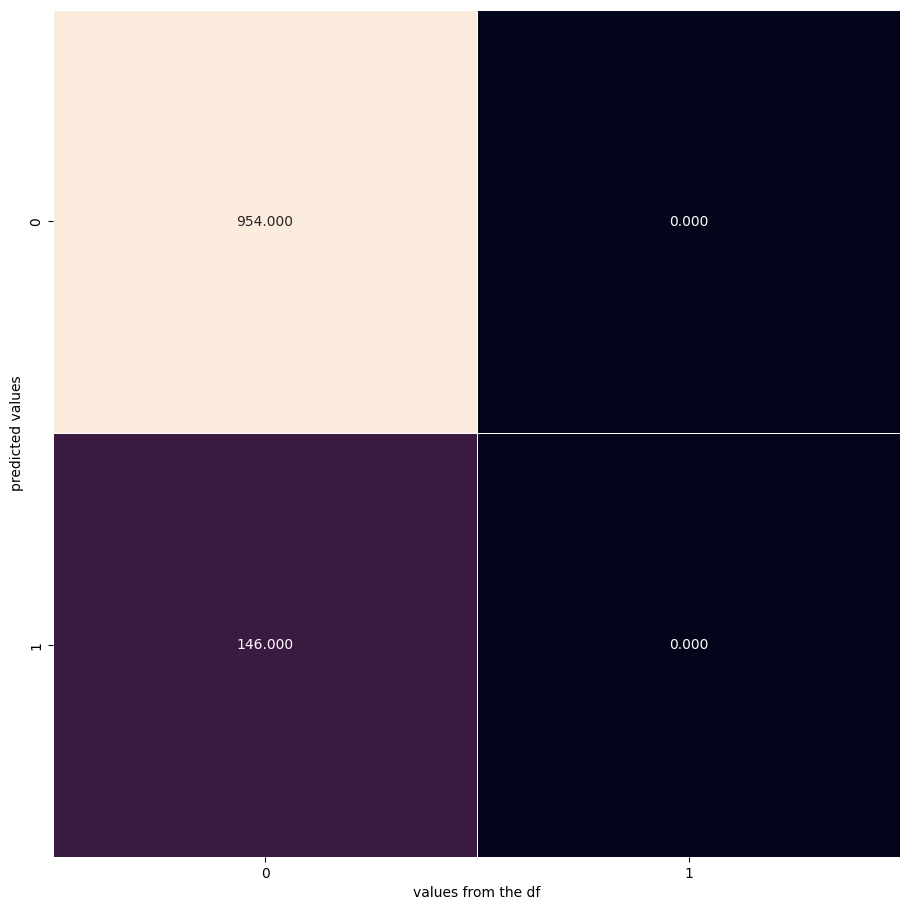

In [ ]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#importante pasar la variable y a int para poder ser trabajada

y_pred = np.array(y_pred, dtype=np.int32)
mat_confusion = confusion_matrix(y_list,y_pred)

plt.figure(figsize=(11,11))
sns.heatmap(mat_confusion, annot = True, fmt = '0.3f', linewidth = 0.5, square = True , cbar = False)
plt.ylabel('predicted values')
plt.xlabel('values from the df')
plt.show()

Análisis:

**Verdaderos positivos**: Para esta parte el valor original que se tenia fue predecido de forma correcta por el modelo en este caso 954 de 1200.

**Falsos negativos**: Esta parte de la matriz de confusión muestra que el valor original era positivo pero el algoritmo lo predijo como negativo, para este caso son 146 de 1200

En los demas casos hay un total de 0 valores